In [1]:
import numpy as np

numdata2 = np.arange(15).reshape(3,5)
numdata2

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [2]:
numdata3 = np.arange(24).reshape(2,4,3)

numdata3

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]]])

In [3]:
print(numdata2[2,3])
print(numdata2[0:2,3])
print(numdata2[:,1])
print(numdata2[1:2,:])

13
[3 8]
[ 1  6 11]
[[5 6 7 8 9]]


In [4]:
booldata = numdata2 > 4
booldata

array([[False, False, False, False, False],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [5]:
numdata2[booldata]

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [6]:
tmpdata1 = np.array([10,20,30,40])
tmpdata2 = np.array([1,2,3,4])

tmpdata3 = tmpdata1 - tmpdata2
tmpdata3 

array([ 9, 18, 27, 36])

In [7]:
randomdata = np.random.randint(1,30, (3,5), dtype=int)
print(randomdata)
print(randomdata.max())
print(randomdata.min())
print(randomdata.sum())

[[26 24 23  1 11]
 [ 5 20 23 26  8]
 [ 5 10  9 17 28]]
28
1
236


In [8]:
randomdata1 = np.arange(15).reshape(3,5)
print(randomdata1, "\n")
print(randomdata1.sum(axis=0), "\n")
print(randomdata1.min(axis=1), "\n")
print(randomdata1.max(axis=0), "\n")
print(randomdata1.cumsum(axis=1))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]] 

[15 18 21 24 27] 

[ 0  5 10] 

[10 11 12 13 14] 

[[ 0  1  3  6 10]
 [ 5 11 18 26 35]
 [10 21 33 46 60]]


In [20]:
#pip install ipywidgets
#jupyter nbextension enable --py widgetsnbextension
#conda install -c conda-forge ipywidgets

%reload_ext autoreload
%autoreload 2
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import warnings
from ipywidgets import IntProgress

rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

trn_file = './input/train.csv'
seed = 42

In [21]:
trn = pd.read_csv(trn_file, index_col=0)
print(trn.shape)
trn.head()

(320000, 19)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.2640,20.3368,19.0095,17.6724,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,18,18,1.1898,1.1907,1.1890,1.1894,1.1902,0
1,15.0521,14.0620,13.4524,13.2684,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,1,1,1.2533,1.2578,1.2488,1.2510,1.2555,1
2,16.7864,15.8254,15.5363,15.3935,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,2,2,1.0225,1.0241,1.0210,1.0217,1.0233,0
3,25.6606,21.1887,20.2212,19.8949,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,4,3,1.2054,1.2061,1.2049,1.2051,1.2057,0
4,24.4534,20.6992,19.0424,18.3242,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,13,12,1.1939,1.1943,1.1937,1.1938,1.1941,0


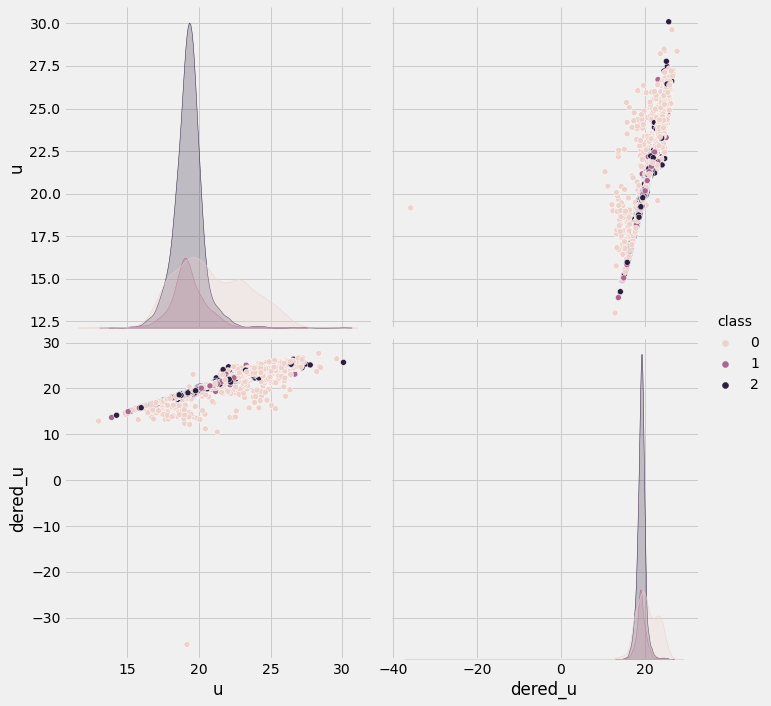

In [22]:
sns.pairplot(trn.sample(n=10000), vars=['u', 'dered_u'], hue='class', size=5)

In [23]:
#RMSE 손실함수 정의
# rmse = lamda y, p:np.sqrt(np.mean((y - p) ** 2)))

def rmse(y, p):
    return np.sqrt(np.mean((y - p) ** 2))

In [24]:
X = trn[trn['class'] != 0][['u']].values
y = trn[trn['class'] != 0][['dered_u']].values

print(X.shape, y.shape)

(200004, 1) (200004, 1)


In [25]:
# NumPy를 이용한 선형회귀

alpha = .001
theta0 = .1
theta1 = .1
epoch =4

x = X.flatten()
x.shape

(200004,)

In [26]:
rmses = []
for i in tqdm(range(epoch)):
    for x_i, y_i in zip(x, y):
        p_i =  theta0 + theta1 * x_i
        theta0 = theta0 + alpha * (y_i - p_i)
        theta1 = theta1 + alpha * (y_i - p_i) * x_i
    rmses.append(rmse(y, theta0 + theta1 * x))

MemoryError: Unable to allocate 298. GiB for an array with shape (200004, 200004) and data type float64